In [16]:
%cd "desktop/H1Bscrapy"

[Errno 2] No such file or directory: 'desktop/H1Bscrapy'
/Users/aamashharoon/Desktop/H1Bscrapy


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string as st
import seaborn as sns
import sys 

In [17]:
pwd()

'/Users/aamashharoon/Desktop/H1Bscrapy'

In [32]:
df=pd.read_csv('H1B.csv', encoding = "ISO-8859-1")
df.head()


,Unnamed: 0,base_salary,employer,job,job_title,location1,no_of_h1b_filings,start_date,status,submit_date,Start.Year,Submit.Year,Submit.Month,Start.Month
0,1,61240.0,INFOSYS LIMITED,TECHNOLOGY ANALYST - US,TECHNOLOGY ANALYST - US,"LONG BEACH, CA",18670,1/13/14,CERTIFIED,1/2/14,2014,2014,1,1
1,2,61700.0,INFOSYS LIMITED,TECHNOLOGY ANALYST - US,TECHNOLOGY ANALYST - US,"IRVINE, CA",18670,1/1/14,CERTIFIED,11/15/13,2014,2013,11,1
2,3,61700.0,INFOSYS LIMITED,TECHNOLOGY ANALYST - US,TECHNOLOGY ANALYST - US,"IRVINE, CA",18670,12/27/13,CERTIFIED,12/16/13,2013,2013,12,12
3,4,61700.0,INFOSYS LIMITED,TECHNOLOGY ANALYST - US,TECHNOLOGY ANALYST - US,"IRVINE, CA",18670,2/7/14,CERTIFIED,1/27/14,2014,2014,1,2
4,5,61700.0,INFOSYS LIMITED,TECHNOLOGY ANALYST - US,TECHNOLOGY ANALYST - US,"IRVINE, CA",18670,2/9/14,CERTIFIED,1/29/14,2014,2014,1,2


In [33]:
df['state'] = df['location1'].str.split().str[-1] 

In [38]:
df.head()

,Unnamed: 0,base_salary,employer,job,job_title,location1,no_of_h1b_filings,start_date,status,submit_date,Start.Year,Submit.Year,Submit.Month,Start.Month,state
0,1,61240.0,INFOSYS LIMITED,TECHNOLOGY ANALYST - US,TECHNOLOGY ANALYST - US,"LONG BEACH, CA",18670,1/13/14,CERTIFIED,1/2/14,2014,2014,1,1,CA
1,2,61700.0,INFOSYS LIMITED,TECHNOLOGY ANALYST - US,TECHNOLOGY ANALYST - US,"IRVINE, CA",18670,1/1/14,CERTIFIED,11/15/13,2014,2013,11,1,CA
2,3,61700.0,INFOSYS LIMITED,TECHNOLOGY ANALYST - US,TECHNOLOGY ANALYST - US,"IRVINE, CA",18670,12/27/13,CERTIFIED,12/16/13,2013,2013,12,12,CA
3,4,61700.0,INFOSYS LIMITED,TECHNOLOGY ANALYST - US,TECHNOLOGY ANALYST - US,"IRVINE, CA",18670,2/7/14,CERTIFIED,1/27/14,2014,2014,1,2,CA
4,5,61700.0,INFOSYS LIMITED,TECHNOLOGY ANALYST - US,TECHNOLOGY ANALYST - US,"IRVINE, CA",18670,2/9/14,CERTIFIED,1/29/14,2014,2014,1,2,CA


In [96]:
def position_comparison_ttl(list_of_dataframe):
    frame = list_of_dataframe
    all_df = pd.concat(frame)
    
    position_sum = all_df.groupby('job_title')['job_title'].aggregate({'Job_no': \
                             'count'}).sort_values(by='Job_no', ascending = False)
    width = 0.4
    ind = np.arange(len(position_sum['Job_no']))
    
    fig, ax = plt.subplots(figsize = (13,8))
    rect1 = ax.bar(ind, position_sum['Job_no'], width, color = 'green', label = 'number of H1B issue')
    
    ax.set_xlabel('Potition')
    ax.set_ylabel('H1B Issue Number')
    ax.set_title('H1B Issue Number across Positions')
    ax.set_xticks(ind)
    ax.set_xticklabels(tuple(position_sum.index.get_values()))
    ax.legend()
    plt.show()

In [ ]:
################################################

In [186]:
#find all rows with 'FINANCE' in the job_title column
fa=df.loc[
    df['job_title'].apply(lambda x: "FINANCE" in x)
]
#These are all the different finance positions
to_be_replaced_finance= set(fa['job_title'])

#convert all finance positions into 'FINANCE POSITIONS' for graphing
fa["job_title"]=fa["job_title"].apply(lambda x: "FINANCE POSITIONS" if x in to_be_replaced_finance else x)


/Users/aamashharoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [200]:
##find all rows related to pure data science in the job_title column
ds=df[df['ds'] == True]
set(ds['job_title'])

to_be_rplaced = {    
    'DATA SCIENCE ANALYST','LEAD DATA SCIENTIST', 'DATA SCIENTIST II',
    'SR. DATA SCIENTIST', 'ASSOCIATE DATA SCIENTIST', 'SENIOR DATA SCIENTIST', 'ANALYTICS','AGRICULTURE DATA ANALYST'
}
#convert all data science positions into 'DATA SCIENTIST' for graphing
ds['job_title'] = ds["job_title"].apply(lambda x: "DATA SCIENTIST" if x in to_be_rplaced else x)


/Users/aamashharoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [209]:
##all jobs related to DATA

ds2=df.loc[
    df['job_title'].apply(lambda x: "DATA" in x)]

to_be_replaced_data= set(ds2['job_title'])

ds2["job_title"]=ds2["job_title"].apply(lambda x: "DATA POSITIONS" if x in to_be_replaced_data else x)

/Users/aamashharoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [111]:
bs = df.loc[df['job_title'] == 'BUSINESS ANALYST']
pa = df.loc[df['job_title'] == 'PRODUCT ANALYST']


/Users/aamashharoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aamashharoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


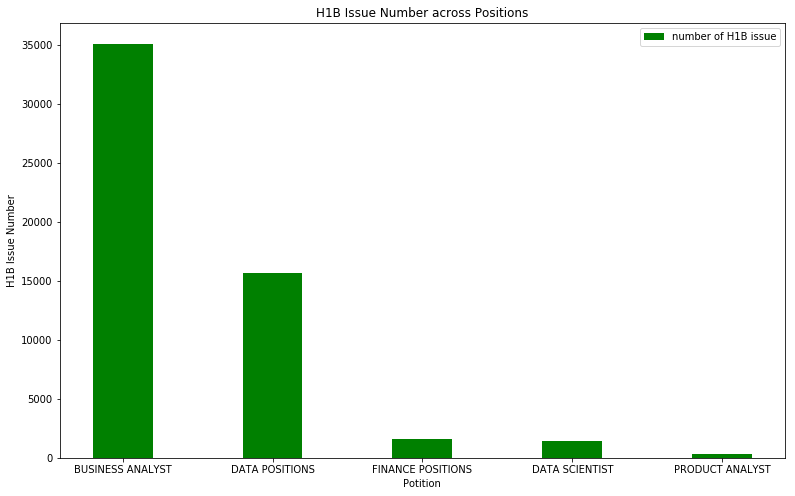

In [211]:
list_of_dataframe = [bs,pa,fa,ds,ds2]
position_comparison_ttl(list_of_dataframe)


In [91]:
def position_no_yearly(list_of_dataframe):
    frame = list_of_dataframe
    all_df = pd.concat(frame)    
    a = all_df.pivot_table('state', index = 'Submit.Year', columns = 'job_title', aggfunc= 'count')
    for i in range(a.shape[1]):
        plt.figure(figsize=(12, 10))
        plt.subplot(a.shape[1],1,i+1)
        plt.plot(a[a.columns[i]])
        plt.title(st.capwords(a.columns[i]) + ' H1B Issue Number over Year')
        plt.show()

/Users/aamashharoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


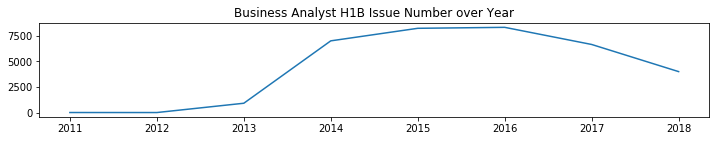

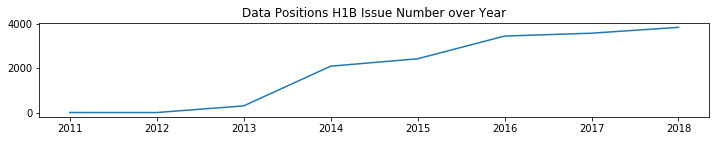

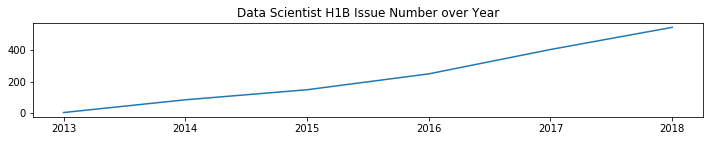

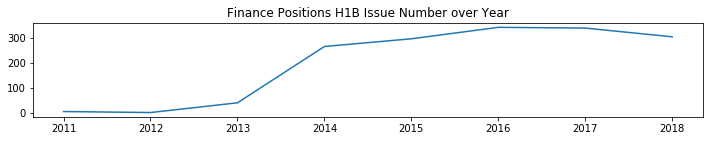

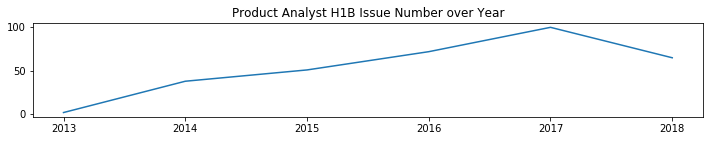

In [212]:
list_of_dataframe = [bs, pa, ds, fa, ds2]
position_no_yearly(list_of_dataframe)

In [100]:
#Base salary distributions
def compare_salary(list_of_dataframe):
    all_df = pd.concat(list_of_dataframe)
    all_df = all_df[all_df['base_salary']<300000]

    fig, bx = plt.subplots(figsize = (13,8))
    sns.boxplot(x = 'job_title', y = 'base_salary', data = all_df)
    bx.set_title('Base Salary Distribution for Different Positions' )
    plt.show()
    

/Users/aamashharoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


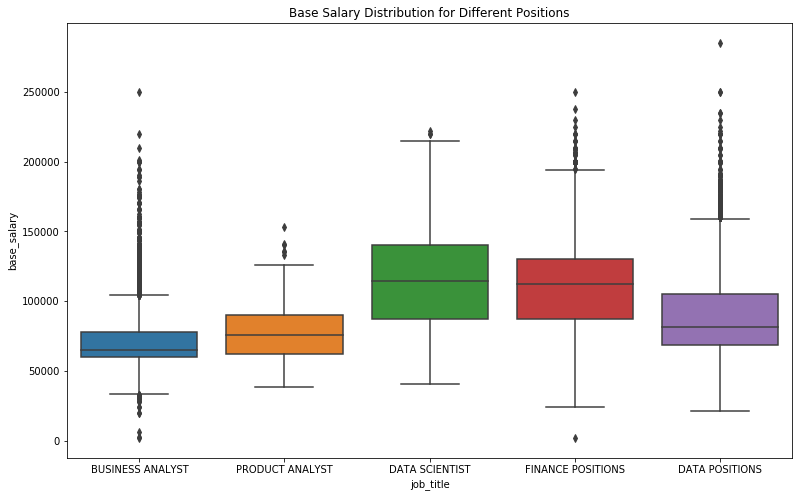

In [213]:
list_of_dataframe = [bs, pa, ds, fa, ds2]
compare_salary(list_of_dataframe)

In [228]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install basemap


Solving environment: done

# All requested packages already installed.



In [8]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [9]:

import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize


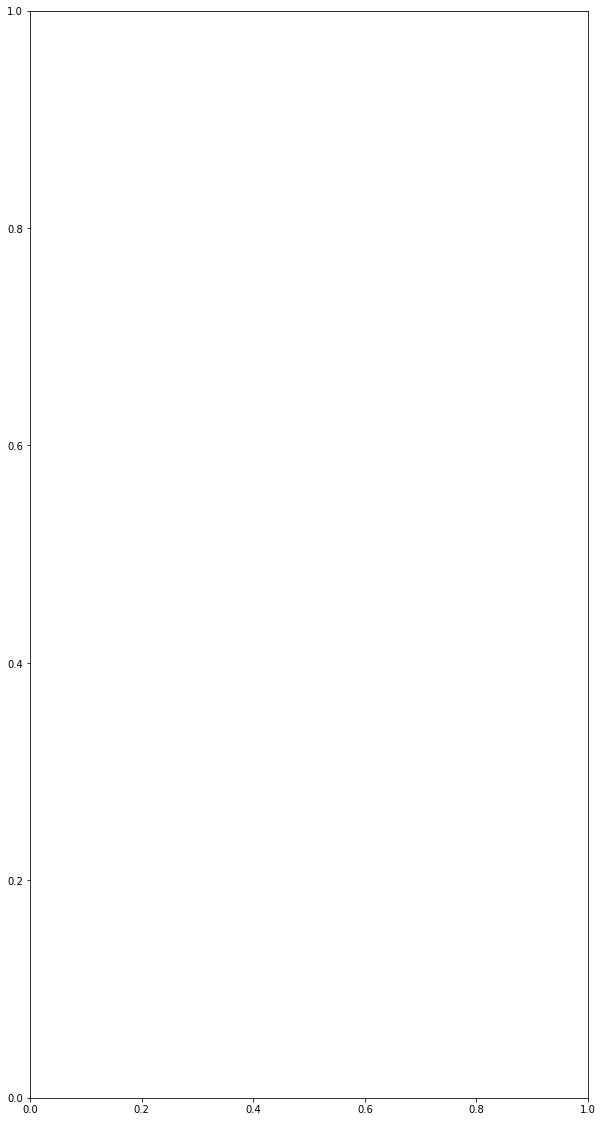

In [12]:
fig, ax = plt.subplots(figsize=(10,20))


In [14]:
m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2)

m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2)

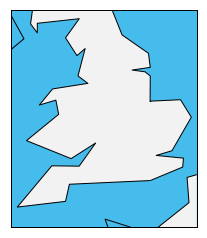

In [15]:

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()